In [ ]:
import sys

In [1]:
import cvxpy as cp
import numpy as np
import matplotlib.pyplot as plt
from numpy import arange, quantile
from numpy.random import randint, permutation

In [2]:
from vqr import VectorQuantileEstimator
from vqr.vqr import check_comonotonicity
from vqr.plot import plot_quantiles, plot_quantiles_3d
from experiments.data.mvn import IndependentDataProvider

In [ ]:

if ".." not in sys.path:
    sys.path.append("..")


plt.rcParams["font.size"] = 14

# Scalar Quantiles via Optimal Transport

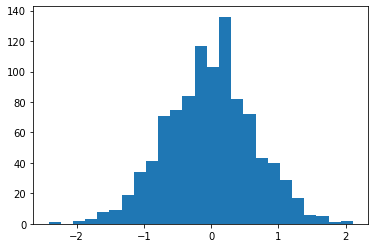

In [4]:
d = 1
k = 1
T = 50
N = 1000

_, Y = IndependentDataProvider(d=d, k=k).sample(n=N)

plt.hist(Y, 25)


solver = "vqe_pot"
solver_opts = {"numItermax": int(2e6)}

In [5]:
vq1 = VectorQuantileEstimator(
    n_levels=T,
    solver=solver,
    solver_opts=solver_opts,
)
vq1.fit(Y)

VectorQuantileEstimator(solver=<vqr.solvers.primal.pot.POTVQESolver object at 0x164d1b820>,
                        solver_opts={'numItermax': 2000000})

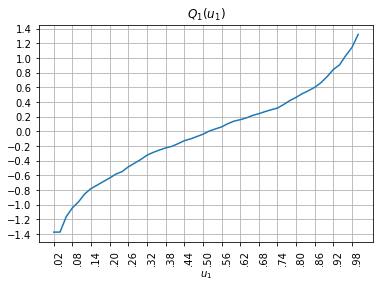

In [6]:
fig = plot_quantiles(T, d, Qs=vq1.vector_quantiles(refine=True), Us=vq1.quantile_grid)
fig.savefig("figs/qr_1d.png", dpi=150, bbox_inches="tight")

# 2D Vector Quantiles

Text(0, 0.5, 'y_2')

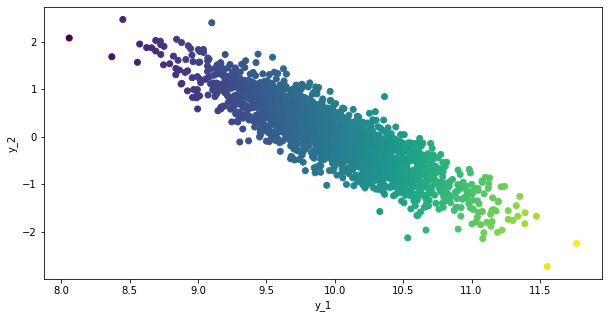

In [7]:
d = 2
k = 1
T = 50
N = 2000

_, Y = IndependentDataProvider(d=d, k=k, seed=31).sample(n=N)
Y[:, 0] += 10

fig, ax = plt.subplots(1, 1, figsize=(10, 5))
ax.scatter(Y[:, 0], Y[:, 1], c=np.sum(Y**2, axis=1))
ax.set_xlabel(f"y_1")
ax.set_ylabel(f"y_2")

In [8]:
vq2 = VectorQuantileEstimator(
    n_levels=T,
    solver=solver,
    solver_opts=solver_opts,
)
vq2.fit(Y)

VectorQuantileEstimator(solver=<vqr.solvers.primal.pot.POTVQESolver object at 0x16500c5e0>,
                        solver_opts={'numItermax': 2000000})

In [9]:
Qs = vq2.vector_quantiles(refine=False)
Us = vq2.quantile_grid

Qs_T = [Q.transpose() for Q in Qs]
Us_T = [U.transpose() for U in Us]

violations = check_comonotonicity(T, d, Qs, Us) < 0
print(f"violations  ={np.sum(violations) / np.prod(violations.shape)}")

violations_T = check_comonotonicity(T, d, Qs_T, Us_T) < 0
print(f"violations_T={np.sum(violations_T) / np.prod(violations_T.shape)}")

violations  =0.00011616
violations_T=0.00011616


Q_0, sweeping over u0
Q_1, sweeping over u1


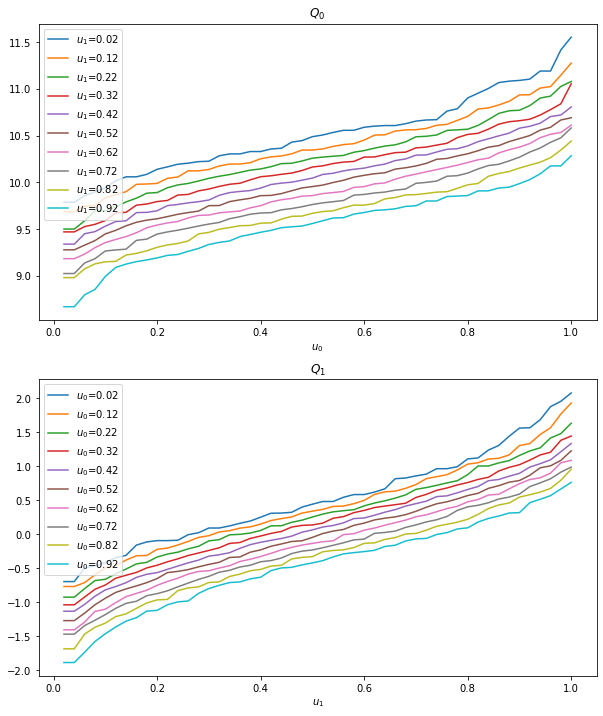

In [10]:

Qs = vq2.vector_quantiles(refine=False)
Us = vq2.quantile_grid
# u_levels = vq2.quantile_levels

fig, axes = plt.subplots(2, 1, figsize=(10, 12))

for i, d_ in enumerate(range(d), start=0):
    ax = axes[d_]

    # Get the surface of dimension d_
    # Qs = list(reversed(Qs))

    # We need to transpose in order for e.g.
    # Q1[:, u2]
    # Q2[u1, :]
    # to be monotonic quantiles curves for Y1 and Y2
    Q_d = Qs[d_].transpose()
    U_d = Us[d_].transpose()

    u_sweep = d_

    print(f"Q_{i}, sweeping over u{u_sweep}")

    # Loop over levels of u_d
    for j, u_idx in enumerate(range(0, T, T // 10), start=0):

        idx_q = [u_idx] * d
        idx_q[u_sweep] = slice(None)

        ax.plot(
            U_d[tuple(idx_q)],
            Q_d[tuple(idx_q)],
            color=f"C{j}",
            label=f"$u_{1-u_sweep}$={U_d[tuple(idx_q)][u_idx]:.2f}",
        )

    ax.set_xlabel(f"$u_{u_sweep}$")
    ax.set_title(f"$Q_{i}$")
    ax.legend()

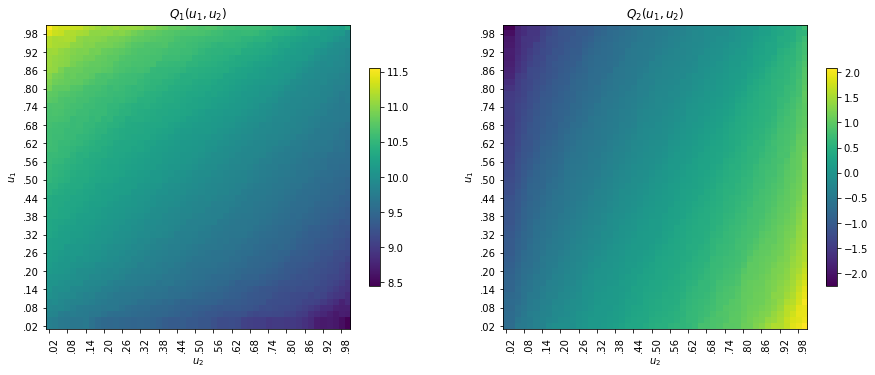

In [11]:
fig = plot_quantiles(T, d, Qs=Qs, Us=Us, figsize=(15, 20))

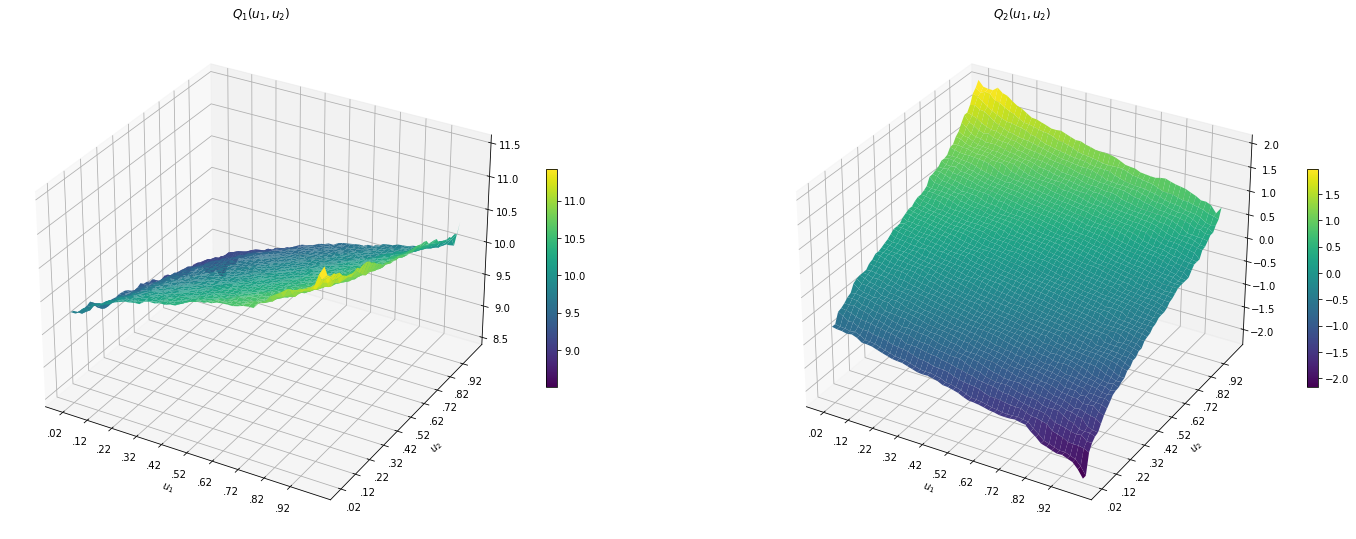

In [12]:
plot_quantiles_3d(T, d, Qs=Qs, Us=Us, figsize=(25, 20))
fig.savefig("figs/qr_2d.png", dpi=150, bbox_inches="tight")

# 3D Vector Quantiles

Text(0.5, 0, 'y_3')

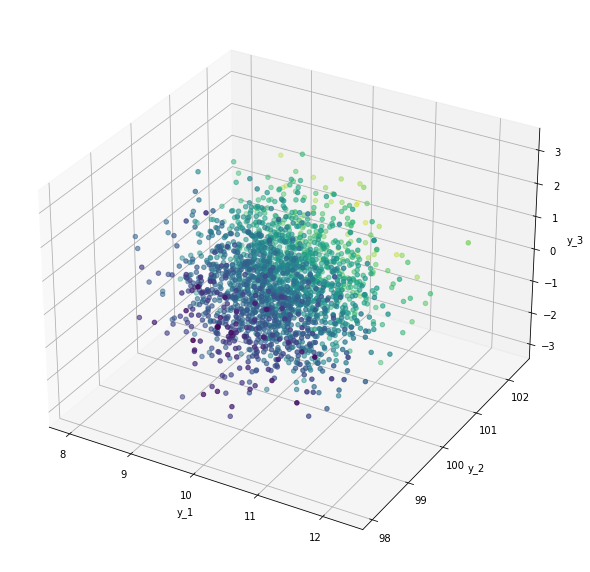

In [13]:
d = 3
k = 1
T = 10
N = 2000

_, Y = IndependentDataProvider(d=d, k=k).sample(n=N)
Y[:, 0] += 10
Y[:, 1] += 100

fig, ax = plt.subplots(1, 1, subplot_kw={"projection": "3d"}, figsize=(10, 20))
ax.scatter(Y[:, 0], Y[:, 1], Y[:, 2], c=np.sum(Y**2, axis=1))
ax.set_xlabel("y_1")
ax.set_ylabel("y_2")
ax.set_zlabel("y_3")

In [14]:
vq3 = VectorQuantileEstimator(
    n_levels=T,
    solver=solver,
    solver_opts=solver_opts,
)
vq3.fit(Y)

VectorQuantileEstimator(n_levels=10,
                        solver=<vqr.solvers.primal.pot.POTVQESolver object at 0x29d564400>,
                        solver_opts={'numItermax': 2000000})

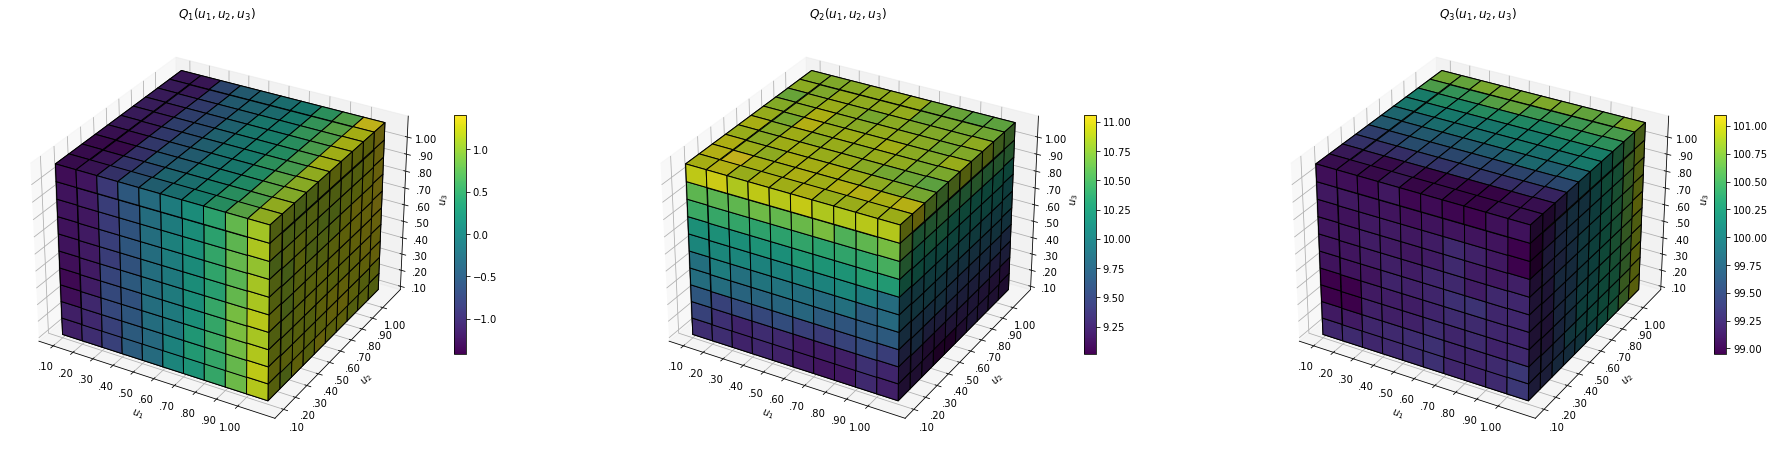

In [15]:
fig, ax = plot_quantiles_3d(
    T, d, Qs=vq3.vector_quantiles(refine=True), Us=vq3.quantile_grid, figsize=(32, 22)
)
fig.savefig("figs/qr_3d.png", dpi=150, bbox_inches="tight")

d = 3
k = 1
T = 10
N = 2000

_, Y = IndependentDataProvider(d=d, k=k).sample(n=N)
Y[:,0] += 10
Y[:,1] += 100

fig, ax = plt.subplots(1, 1, subplot_kw={"projection": "3d"}, figsize=(10, 20))
ax.scatter(Y[:, 0], Y[:, 1], Y[:, 2], c=np.sum(Y**2, axis=1))
ax.set_xlabel("y_1")
ax.set_ylabel("y_2")
ax.set_zlabel("y_3")

In [ ]:
vq3 = VectorQuantileEstimator(
    n_levels=T,
    solver=solver,
    solver_opts=solver_opts,
)
vq3.fit(Y)

In [ ]:
fig, ax = plot_quantiles_3d(
    T, d, Qs=vq3.vector_quantiles(refine=True), Us=vq3.quantile_grid, figsize=(32, 22)
)
fig.savefig("figs/qr_3d.png", dpi=150, bbox_inches="tight")

In [17]:
vq3 = VectorQuantileEstimator(
    n_levels=T,
    solver=solver,
    solver_opts=solver_opts,
)
vq3.fit(Y)

VectorQuantileEstimator(n_levels=10,
                        solver=<vqr.solvers.primal.pot.POTVQESolver object at 0x2a2a8b5e0>,
                        solver_opts={'numItermax': 2000000})

In [ ]:
fig, ax = plot_quantiles_3d(
    T, d, Qs=vq3.vector_quantiles(refine=True), Us=vq3.quantile_grid, figsize=(32, 22)
)
fig.savefig("figs/qr_3d.png", dpi=150, bbox_inches="tight")